In [1]:
# HPC
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/'
dataPath = '/scratch2/shreyas/GrIS_paleo_data/'

ds_age  = xr.open_dataset(dataPath + 'RRRAG4_Greenland_1993_2013_01_age_grid.nc')
ds_age_corrected  = xr.open_dataset(dataPath + 'RRRAG4_Greenland_1993_2013_01_age_grid_corrected.nc')
ds_age_40km  = xr.open_dataset(dataPath + 'age_data_40kms.nc')
ds_ser_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp/grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp_ser.nc')
ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp/grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp0006.nc')

In [3]:
temp = ds_age_corrected.interp(xData=ds_age_40km['xModel'].data, yData=ds_age_40km['yModel'].data, method = 'nearest')
temp['age_c_uncert_real'][:, 50, 20].data

array([5.14403185e+03,            nan,            nan,            nan,
       4.21083818e+03, 3.91212650e+03, 3.55461423e+03, 3.07364625e+03,
       2.54951370e+03, 2.12199089e+03, 1.80744193e+03, 1.48130708e+03,
       1.10960206e+03, 8.59047845e+02, 6.50712551e+02, 5.44837108e+02,
       4.47174655e+02, 3.78381771e+02, 3.16227408e+02, 2.64287499e+02,
       2.18145340e+02, 1.72470824e+02, 1.28183291e+02, 7.92102711e+01,
       7.86874342e+01, 1.00000000e+00])

In [4]:
ds_age_corrected['age_c_uncert_real'][:, 1300, 762].data

array([           nan,            nan,            nan,            nan,
       2.51299235e+03, 2.15341224e+03, 1.50654907e+03, 1.11812692e+03,
       5.09571507e+02, 3.93778645e+02, 3.40399533e+02, 2.92254004e+02,
       2.56689806e+02, 2.22849571e+02, 1.92619988e+02, 1.66543164e+02,
       1.39441840e+02, 1.17399877e+02, 1.01247461e+02, 8.47811841e+01,
       6.82166201e+01, 7.71955162e+01, 9.38941211e+01, 1.08097447e+02,
       1.50308069e+02, 1.00000000e+00])

In [5]:
ds_age_40km['age_c_uncert_real'][:, 50, 20].data, ds_age_40km['age_c_uncert'][:, 50, 20].data, ds_age_40km['age_c'][:, 50, 20].data

(array([5.14403185e+03, 5.12092211e+03, 5.09722734e+03, 5.07293273e+03,
        5.04802311e+03, 5.02248289e+03, 4.99629613e+03, 4.96944644e+03,
        4.94191704e+03, 4.91369074e+03, 4.88474989e+03, 4.85507639e+03,
        4.82465170e+03, 4.79345682e+03, 4.76147222e+03, 4.72867794e+03,
        4.69505346e+03, 4.66057778e+03, 4.62522934e+03, 4.58898605e+03,
        4.55182525e+03, 4.51372373e+03, 4.47465766e+03, 4.43460263e+03,
        4.39353360e+03, 4.35142491e+03, 4.30825023e+03, 4.26398257e+03,
        4.21859427e+03, 4.16118332e+03, 4.10008926e+03, 4.03744859e+03,
        3.97322217e+03, 3.90643352e+03, 3.82562313e+03, 3.74276701e+03,
        3.65781338e+03, 3.57070914e+03, 3.45611754e+03, 3.33292647e+03,
        3.20661680e+03, 3.07710959e+03, 2.93271783e+03, 2.78435208e+03,
        2.63223044e+03, 2.48976057e+03, 2.35931664e+03, 2.22557050e+03,
        2.09730484e+03, 1.99385616e+03, 1.88778867e+03, 1.77798978e+03,
        1.66237697e+03, 1.54383740e+03, 1.41405163e+03, 1.272021

In [6]:
np.nanmax(1/ds_age_40km['age_c_uncert_real']**2), np.nanmax(1/ds_age_40km['age_c_uncert']**2)

(1.0, 1.0)

In [7]:
np.nanmin(np.abs(ds_age_40km['age_c_uncert_real'])), np.nanmin(np.abs(ds_age_40km['age_c_uncert']))

(1.0, 1.0)

In [8]:
np.unique(np.sort(ds_age_40km['age_c_uncert_real']))

array([-9.99000000e+02,  1.00000000e+00,  4.68634419e+00, ...,
        1.60374074e+04,  1.81816299e+04,  2.02729113e+04])

In [9]:
np.sum(ds_age_40km['age_c_uncert_real'].data[ds_age_40km['age_c_uncert_real'].data > 0]), \
np.sum(ds_age_40km['age_c_uncert'].data[ds_age_40km['age_c_uncert'].data > 0])

(46978146.46701638, 114171489.37372668)

In [10]:
ds_age_40km['age_c_uncert_real'].data[:, 35, 20], ds_age_40km['age_c_uncert'].data[:, 35, 20]

(array([-999.        , -999.        , -999.        , -999.        ,
        -999.        , -999.        , -999.        , -999.        ,
        -999.        , -999.        , -999.        , -999.        ,
        -999.        , -999.        , -999.        , -999.        ,
        -999.        , -999.        , -999.        , -999.        ,
        -999.        , -999.        , -999.        , -999.        ,
        -999.        , -999.        , -999.        , -999.        ,
        -999.        , -999.        , -999.        , -999.        ,
        -999.        , -999.        , -999.        , -999.        ,
        -999.        , -999.        ,  510.60417192,  499.5368097 ,
         488.18927586,  476.55447783,  451.70533972,  425.87238215,
         399.38546016,  378.11790316,  363.13086742,  347.76443306,
         332.45560401,  318.17286061,  303.52854784,  288.76917723,
         274.37763251,  259.62176409,  245.76864939,  232.95151606,
         219.80991546,  208.00032417,  196.10808

In [11]:
age_isochrones = ds_age['age_iso'].data
age_isochrones

array([ 11700.,  29000.,  57000., 115000.])

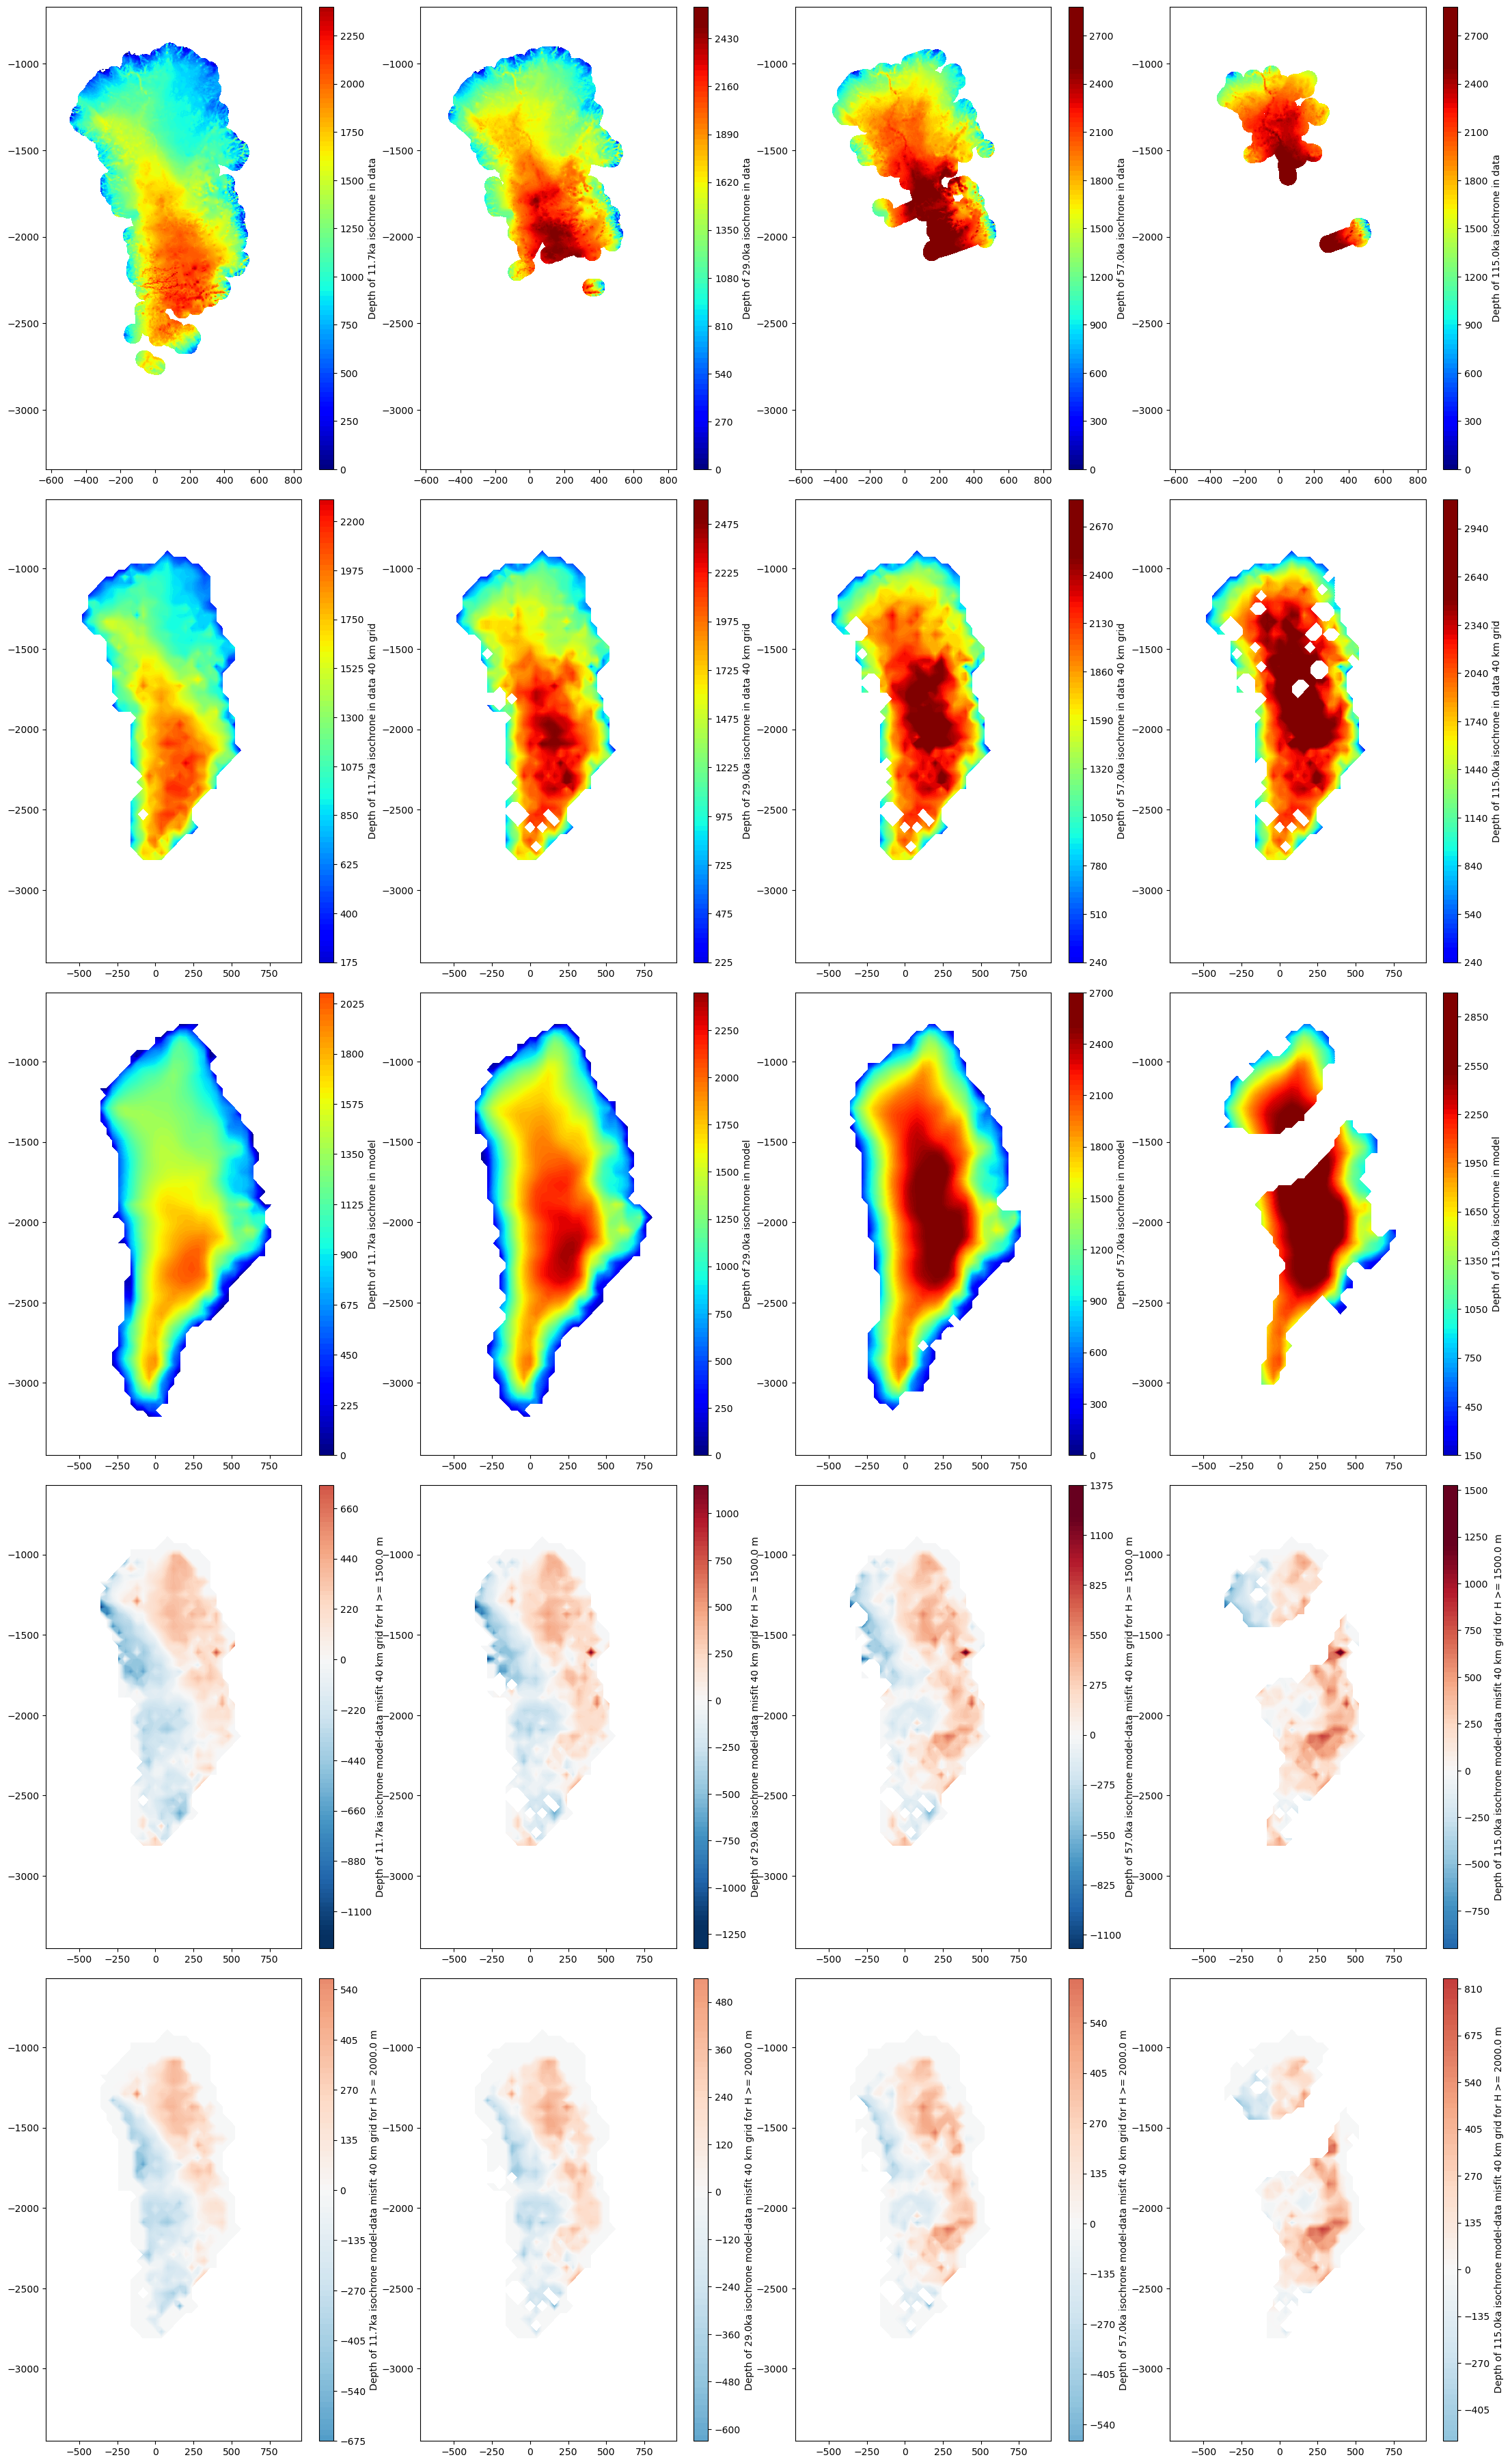

In [12]:
sigma_level_c = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['sigma_level_c'].data
age_c = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['age_c'].data
H = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['H'].data
cell_area = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['cell_area'].data
zb = ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['zb'].data

age_iso_11700_data = ds_age['depth_iso'][0]
age_iso_29000_data = ds_age['depth_iso'][1]
age_iso_57000_data = ds_age['depth_iso'][2]
age_iso_115000_data = ds_age['depth_iso'][3]

age_iso_1000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma_levelModel'].data, 
                                                                               ds_age_40km['H'].data, 
                                                                               ds_age_40km['age_c'].data, 
                                                                               age_iso_value = 1000.0)
age_iso_2000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma_levelModel'].data, 
                                                                               ds_age_40km['H'].data, 
                                                                               ds_age_40km['age_c'].data, 
                                                                               age_iso_value = 2000.0)
age_iso_3000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma_levelModel'].data, 
                                                                               ds_age_40km['H'].data, 
                                                                               ds_age_40km['age_c'].data, 
                                                                               age_iso_value = 3000.0)
age_iso_4000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma_levelModel'].data, 
                                                                               ds_age_40km['H'].data, 
                                                                               ds_age_40km['age_c'].data, 
                                                                               age_iso_value = 4000.0)
age_iso_5000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma_levelModel'].data, 
                                                                               ds_age_40km['H'].data, 
                                                                               ds_age_40km['age_c'].data, 
                                                                               age_iso_value = 5000.0)
age_iso_6000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma_levelModel'].data, 
                                                                               ds_age_40km['H'].data, 
                                                                               ds_age_40km['age_c'].data, 
                                                                               age_iso_value = 6000.0)
age_iso_7000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma_levelModel'].data, 
                                                                               ds_age_40km['H'].data, 
                                                                               ds_age_40km['age_c'].data, 
                                                                               age_iso_value = 7000.0)
age_iso_8000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma_levelModel'].data, 
                                                                               ds_age_40km['H'].data, 
                                                                               ds_age_40km['age_c'].data, 
                                                                               age_iso_value = 8000.0)
age_iso_9000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma_levelModel'].data, 
                                                                               ds_age_40km['H'].data, 
                                                                               ds_age_40km['age_c'].data, 
                                                                               age_iso_value = 9000.0)
age_iso_10000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma_levelModel'].data, 
                                                                                ds_age_40km['H'].data, 
                                                                                ds_age_40km['age_c'].data, 
                                                                                age_iso_value = 10000.0)
age_iso_11000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma_levelModel'].data, 
                                                                                ds_age_40km['H'].data, 
                                                                                ds_age_40km['age_c'].data, 
                                                                                age_iso_value = 11000.0)
age_iso_11700_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma_levelModel'].data, 
                                                                                ds_age_40km['H'].data, 
                                                                                ds_age_40km['age_c'].data, 
                                                                                age_iso_value = 11700.0)
age_iso_21000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma_levelModel'].data, 
                                                                                ds_age_40km['H'].data, 
                                                                                ds_age_40km['age_c'].data, 
                                                                                age_iso_value = 21000.0)
age_iso_29000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma_levelModel'].data, 
                                                                                ds_age_40km['H'].data, 
                                                                                ds_age_40km['age_c'].data, 
                                                                                age_iso_value = 29000.0)
age_iso_57000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma_levelModel'].data, 
                                                                                ds_age_40km['H'].data, 
                                                                                ds_age_40km['age_c'].data, 
                                                                                age_iso_value = 57000.0)
age_iso_60000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma_levelModel'].data, 
                                                                                ds_age_40km['H'].data, 
                                                                                ds_age_40km['age_c'].data, 
                                                                                age_iso_value = 60000.0)
age_iso_115000_data_40km = ds_age_40km['H'].data - ageContours.get_age_isochrone(ds_age_40km['sigma_levelModel'].data, 
                                                                                 ds_age_40km['H'].data, 
                                                                                 ds_age_40km['age_c'].data, 
                                                                                 age_iso_value = 115000.0)

age_iso_1000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 1000.0)
age_iso_2000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 2000.0)
age_iso_3000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 3000.0)
age_iso_4000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 4000.0)
age_iso_5000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 5000.0)
age_iso_6000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 6000.0)
age_iso_7000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 7000.0)
age_iso_8000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 8000.0)
age_iso_9000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 9000.0)
age_iso_10000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 10000.0)
age_iso_11000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 11000.0)
age_iso_11700 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 11700.0)
age_iso_21000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 21000.0)
age_iso_29000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 29000.0)
age_iso_30000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 30000.0)
age_iso_57000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 57000.0)
age_iso_60000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 60000.0)
age_iso_115000 = H - ageContours.get_age_isochrone(sigma_level_c, H, age_c, age_iso_value = 115000.0)

n_rows, n_cols = 5, 4
aspect_ratio = ds_age['x'].shape[0]/ds_age['x'].shape[1]
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.5)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         age_iso_11700_data,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100,
                         fig = fig, ax = ax[0,0],
                         cbar_label = 'Depth of 11.7ka isochrone in data')
fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         age_iso_29000_data,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100,
                         fig = fig, ax = ax[0,1],
                         cbar_label = 'Depth of 29.0ka isochrone in data')
fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         age_iso_57000_data,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100,
                         fig = fig, ax = ax[0,2],
                         cbar_label = 'Depth of 57.0ka isochrone in data')
fancyPlotter.plot_normal(ds_age['x'], ds_age['y'], 
                         age_iso_115000_data,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100,
                         fig = fig, ax = ax[0,3],
                         cbar_label = 'Depth of 115.0ka isochrone in data')

fancyPlotter.plot_normal(ds_age_40km['xModel'], ds_age_40km['yModel'], 
                         age_iso_11700_data_40km,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100,
                         fig = fig, ax = ax[1,0],
                         cbar_label = 'Depth of 11.7ka isochrone in data 40 km grid')
fancyPlotter.plot_normal(ds_age_40km['xModel'], ds_age_40km['yModel'], 
                         age_iso_29000_data_40km,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100,
                         fig = fig, ax = ax[1,1],
                         cbar_label = 'Depth of 29.0ka isochrone in data 40 km grid')
fancyPlotter.plot_normal(ds_age_40km['xModel'], ds_age_40km['yModel'], 
                         age_iso_57000_data_40km,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100,
                         fig = fig, ax = ax[1,2],
                         cbar_label = 'Depth of 57.0ka isochrone in data 40 km grid')
fancyPlotter.plot_normal(ds_age_40km['xModel'], ds_age_40km['yModel'], 
                         age_iso_115000_data_40km,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100,
                         fig = fig, ax = ax[1,3],
                         cbar_label = 'Depth of 115.0ka isochrone in data 40 km grid')


fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         age_iso_11700,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100, 
                         fig = fig, ax = ax[2,0],
                         cbar_label= "Depth of 11.7ka isochrone in model")
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         age_iso_29000,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100, 
                         fig = fig, ax = ax[2,1],
                         cbar_label= "Depth of 29.0ka isochrone in model")
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         age_iso_57000,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100, 
                         fig = fig, ax = ax[2,2],
                         cbar_label= "Depth of 57.0ka isochrone in model")
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         age_iso_115000,
                         cmap = 'jet', vmin = 0, vmax = 2500, nbins = 100, 
                         fig = fig, ax = ax[2,3],
                         cbar_label= "Depth of 115.0ka isochrone in model")

fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         (age_iso_11700-age_iso_11700_data_40km)*(ds_age_40km['H'].data >= 1500.0),
                         cmap = 'RdBu_r', vmin = -1200, vmax = 1200, nbins = 100, 
                         fig = fig, ax = ax[3,0],
                         cbar_label= "Depth of 11.7ka isochrone model-data misfit 40 km grid for H >= 1500.0 m")
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         (age_iso_29000-age_iso_29000_data_40km)*(ds_age_40km['H'].data >= 1500.0),
                         cmap = 'RdBu_r', vmin = -1200, vmax = 1200, nbins = 100, 
                         fig = fig, ax = ax[3,1],
                         cbar_label= "Depth of 29.0ka isochrone model-data misfit 40 km grid for H >= 1500.0 m")
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         (age_iso_57000-age_iso_57000_data_40km)*(ds_age_40km['H'].data >= 1500.0),
                         cmap = 'RdBu_r', vmin = -1200, vmax = 1200, nbins = 100, 
                         fig = fig, ax = ax[3,2],
                         cbar_label= "Depth of 57.0ka isochrone model-data misfit 40 km grid for H >= 1500.0 m")
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         (age_iso_115000-age_iso_115000_data_40km)*(ds_age_40km['H'].data >= 1500.0),
                         cmap = 'RdBu_r', vmin = -1200, vmax = 1200, nbins = 100, 
                         fig = fig, ax = ax[3,3],
                         cbar_label= "Depth of 115.0ka isochrone model-data misfit 40 km grid for H >= 1500.0 m")

fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         (age_iso_11700-age_iso_11700_data_40km)*(ds_age_40km['H'].data >= 2000.0),
                         cmap = 'RdBu_r', vmin = -1200, vmax = 1200, nbins = 100, 
                         fig = fig, ax = ax[4,0],
                         cbar_label= "Depth of 11.7ka isochrone model-data misfit 40 km grid for H >= 2000.0 m")
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         (age_iso_29000-age_iso_29000_data_40km)*(ds_age_40km['H'].data >= 2000.0),
                         cmap = 'RdBu_r', vmin = -1200, vmax = 1200, nbins = 100, 
                         fig = fig, ax = ax[4,1],
                         cbar_label= "Depth of 29.0ka isochrone model-data misfit 40 km grid for H >= 2000.0 m")
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         (age_iso_57000-age_iso_57000_data_40km)*(ds_age_40km['H'].data >= 2000.0),
                         cmap = 'RdBu_r', vmin = -1200, vmax = 1200, nbins = 100, 
                         fig = fig, ax = ax[4,2],
                         cbar_label= "Depth of 57.0ka isochrone model-data misfit 40 km grid for H >= 2000.0 m")
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0, 
                         (age_iso_115000-age_iso_115000_data_40km)*(ds_age_40km['H'].data >= 2000.0),
                         cmap = 'RdBu_r', vmin = -1200, vmax = 1200, nbins = 100, 
                         fig = fig, ax = ax[4,3],
                         cbar_label= "Depth of 115.0ka isochrone model-data misfit 40 km grid for H >= 2000.0 m")
    
plt.tight_layout()

In [13]:
print(f"Total ice from Holocene as percentage of total volume: {np.nansum(cell_area*age_iso_11700)/np.nansum(cell_area*H)*100:2.2f}%")

Total ice from Holocene as percentage of total volume: 66.09%


In [14]:
print(f"Total ice younger than 60ka and in columns with H >= 2000: {np.nansum(cell_area*age_iso_60000*(ds_age_40km['H'].data >= 2000.0))/np.nansum(cell_area*H)*100:2.2f}%")

Total ice younger than 60ka and in columns with H >= 2000: 55.47%


In [15]:
print(f"Total ice younger than 60ka and in columns with H >= 2000: {np.nansum(cell_area*age_iso_60000*(ds_age_40km['H'].data >= 2000.0)*(ds_age_40km['H'].data >= 2000.0))/np.nansum(cell_area*H)*100:2.2f}%")

Total ice younger than 60ka and in columns with H >= 2000: 55.47%


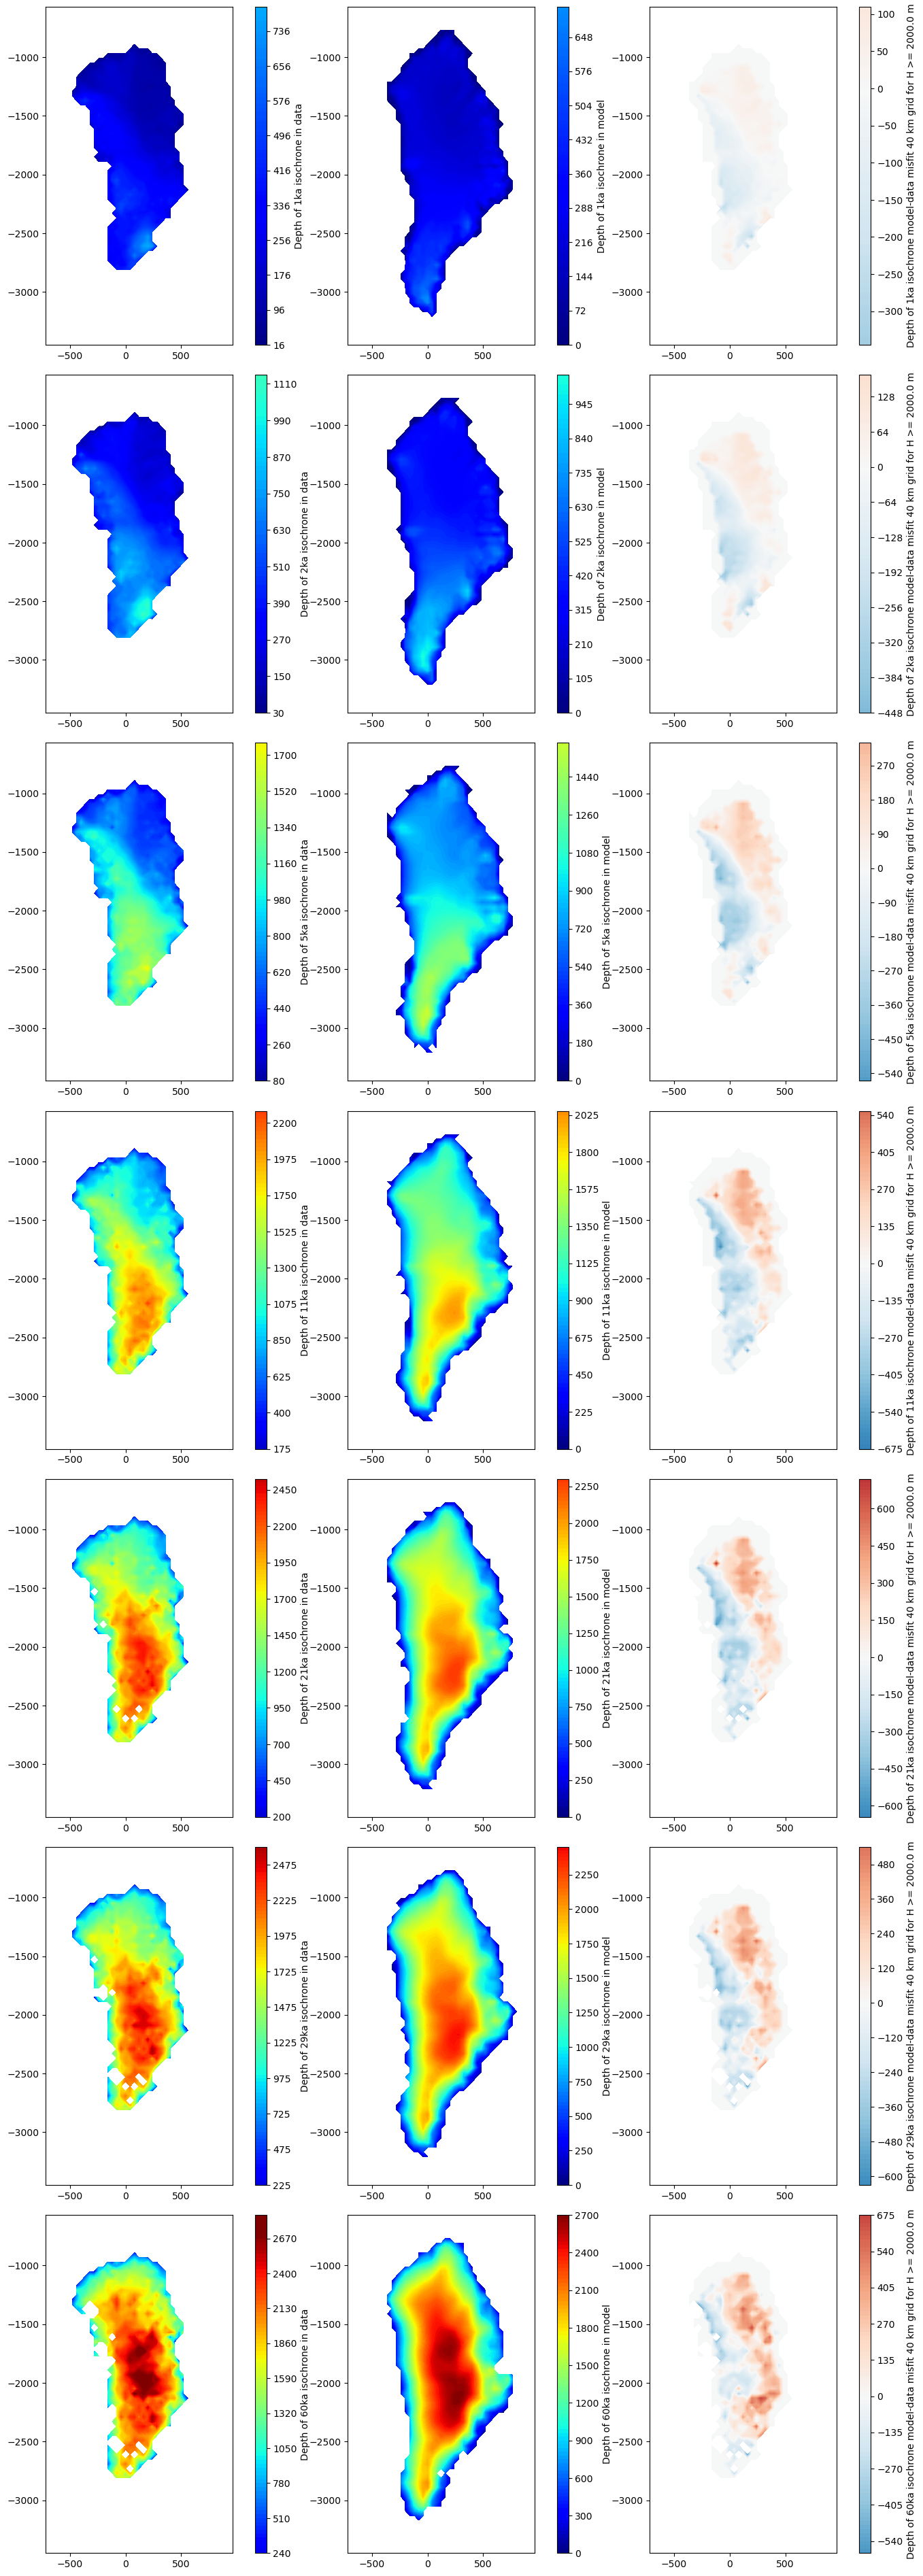

In [16]:
n_rows, n_cols = 7, 3
aspect_ratio = ds_age['x'].shape[0]/ds_age['x'].shape[1]
subplot_width = 3
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.5)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_age_40km['xModel'], ds_age_40km['yModel'], 
                         age_iso_1000_data_40km,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[0,0],
                         cbar_label = 'Depth of 1ka isochrone in data')
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0,
                         age_iso_1000,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[0,1],
                         cbar_label = 'Depth of 1ka isochrone in model')
fancyPlotter.plot_normal(ds_age_40km['xModel'], ds_age_40km['yModel'], 
                         (age_iso_1000-age_iso_1000_data_40km)*(ds_age_40km['H'].data >= 2000.0),
                         cmap = 'RdBu_r', vmin = -1000, vmax = 1000, nbins = 100,
                         fig = fig, ax = ax[0,2],
                         cbar_label = 'Depth of 1ka isochrone model-data misfit 40 km grid for H >= 2000.0 m')

fancyPlotter.plot_normal(ds_age_40km['xModel'], ds_age_40km['yModel'], 
                         age_iso_2000_data_40km,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[1,0],
                         cbar_label = 'Depth of 2ka isochrone in data')
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0,
                         age_iso_2000,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[1,1],
                         cbar_label = 'Depth of 2ka isochrone in model')
fancyPlotter.plot_normal(ds_age_40km['xModel'], ds_age_40km['yModel'], 
                         (age_iso_2000-age_iso_2000_data_40km)*(ds_age_40km['H'].data >= 2000.0),
                         cmap = 'RdBu_r', vmin = -1000, vmax = 1000, nbins = 100,
                         fig = fig, ax = ax[1,2],
                         cbar_label = 'Depth of 2ka isochrone model-data misfit 40 km grid for H >= 2000.0 m')

fancyPlotter.plot_normal(ds_age_40km['xModel'], ds_age_40km['yModel'], 
                         age_iso_5000_data_40km,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[2,0],
                         cbar_label = 'Depth of 5ka isochrone in data')
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0,
                         age_iso_5000,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[2,1],
                         cbar_label = 'Depth of 5ka isochrone in model')
fancyPlotter.plot_normal(ds_age_40km['xModel'], ds_age_40km['yModel'], 
                         (age_iso_5000-age_iso_5000_data_40km)*(ds_age_40km['H'].data >= 2000.0),
                         cmap = 'RdBu_r', vmin = -1000, vmax = 1000, nbins = 100,
                         fig = fig, ax = ax[2,2],
                         cbar_label = 'Depth of 5ka isochrone model-data misfit 40 km grid for H >= 2000.0 m')

fancyPlotter.plot_normal(ds_age_40km['xModel'], ds_age_40km['yModel'], 
                         age_iso_11000_data_40km,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[3,0],
                         cbar_label = 'Depth of 11ka isochrone in data')
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0,
                         age_iso_11000,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[3,1],
                         cbar_label = 'Depth of 11ka isochrone in model')
fancyPlotter.plot_normal(ds_age_40km['xModel'], ds_age_40km['yModel'], 
                         (age_iso_11000-age_iso_11000_data_40km)*(ds_age_40km['H'].data >= 2000.0),
                         cmap = 'RdBu_r', vmin = -1000, vmax = 1000, nbins = 100,
                         fig = fig, ax = ax[3,2],
                         cbar_label = 'Depth of 11ka isochrone model-data misfit 40 km grid for H >= 2000.0 m')

fancyPlotter.plot_normal(ds_age_40km['xModel'], ds_age_40km['yModel'], 
                         age_iso_21000_data_40km,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[4,0],
                         cbar_label = 'Depth of 21ka isochrone in data')
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0,
                         age_iso_21000,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[4,1],
                         cbar_label = 'Depth of 21ka isochrone in model')
fancyPlotter.plot_normal(ds_age_40km['xModel'], ds_age_40km['yModel'], 
                         (age_iso_21000-age_iso_21000_data_40km)*(ds_age_40km['H'].data >= 2000.0),
                         cmap = 'RdBu_r', vmin = -1000, vmax = 1000, nbins = 100,
                         fig = fig, ax = ax[4,2],
                         cbar_label = 'Depth of 21ka isochrone model-data misfit 40 km grid for H >= 2000.0 m')

fancyPlotter.plot_normal(ds_age_40km['xModel'], ds_age_40km['yModel'], 
                         age_iso_29000_data_40km,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[5,0],
                         cbar_label = 'Depth of 29ka isochrone in data')
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0,
                         age_iso_29000,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[5,1],
                         cbar_label = 'Depth of 29ka isochrone in model')
fancyPlotter.plot_normal(ds_age_40km['xModel'], ds_age_40km['yModel'], 
                         (age_iso_29000-age_iso_29000_data_40km)*(ds_age_40km['H'].data >= 2000.0),
                         cmap = 'RdBu_r', vmin = -1000, vmax = 1000, nbins = 100,
                         fig = fig, ax = ax[5,2],
                         cbar_label = 'Depth of 29ka isochrone model-data misfit 40 km grid for H >= 2000.0 m')

fancyPlotter.plot_normal(ds_age_40km['xModel'], ds_age_40km['yModel'], 
                         age_iso_60000_data_40km,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[6,0],
                         cbar_label = 'Depth of 60ka isochrone in data')
fancyPlotter.plot_normal(ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['x']/1000.0, 
                         ds_grl40_bm5_paleo17a_CT4_BH0_m11ka_pkp['y']/1000.0,
                         age_iso_60000,
                         cmap = 'jet', vmin = 0, vmax = 2700, nbins = 100,
                         fig = fig, ax = ax[6,1],
                         cbar_label = 'Depth of 60ka isochrone in model')
fancyPlotter.plot_normal(ds_age_40km['xModel'], ds_age_40km['yModel'], 
                         (age_iso_60000-age_iso_60000_data_40km)*(ds_age_40km['H'].data >= 2000.0),
                         cmap = 'RdBu_r', vmin = -1000, vmax = 1000, nbins = 100,
                         fig = fig, ax = ax[6,2],
                         cbar_label = 'Depth of 60ka isochrone model-data misfit 40 km grid for H >= 2000.0 m')

plt.tight_layout()

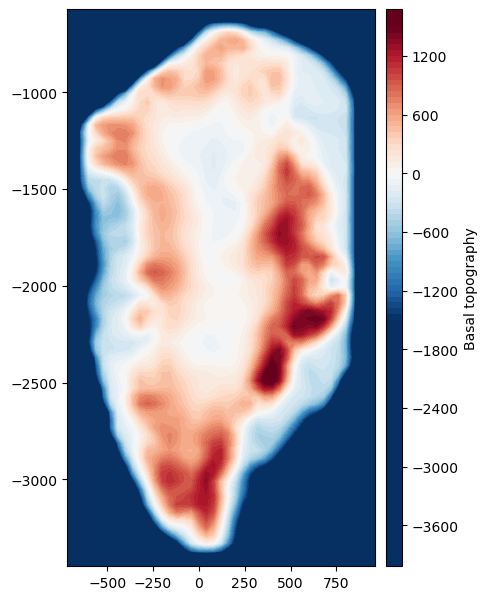

In [17]:
n_rows, n_cols = 1, 1
aspect_ratio = ds_age['x'].shape[0]/ds_age['x'].shape[1]
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+0.1)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

ax.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_age_40km['xModel'], ds_age_40km['yModel'], zb,
                         cmap = 'RdBu_r', vmin = -1500, vmax = 1500, nbins = 100, fig = fig, ax = ax,
                         cbar_label = 'Basal topography')